In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
data_size = 1000

data = {
    'customer_id': list(range(1000, 2000)),
    'age': np.random.randint(18, 100, data_size),
    'gender': np.random.choice(['Male', 'Female'], size=data_size),
    'marital_status': np.random.choice(['Married', 'Single', 'Divorced'], size=data_size),
    'annual_income_in_usd': np.random.randint(25000, 150000, data_size),
    'total_purchases': np.random.randint(1, 50, data_size),
    'preferred_category': np.random.choice(['Electronics', 'Appliances', 'Clothing', 'Food', 'Health', 'Media'], size=data_size)
}

In [180]:
df = pd.DataFrame(data)

In [181]:
df.head()

,customer_id,age,gender,marital_status,annual_income_in_usd,total_purchases,preferred_category
0,1000,40,Female,Married,106098,11,Food
1,1001,52,Male,Single,142620,19,Food
2,1002,37,Female,Divorced,107244,41,Media
3,1003,82,Male,Married,65595,15,Clothing
4,1004,60,Male,Divorced,79122,28,Electronics


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           1000 non-null   int64 
 1   age                   1000 non-null   int32 
 2   gender                1000 non-null   object
 3   marital_status        1000 non-null   object
 4   annual_income_in_usd  1000 non-null   int32 
 5   total_purchases       1000 non-null   int32 
 6   preferred_category    1000 non-null   object
dtypes: int32(3), int64(1), object(3)
memory usage: 43.1+ KB


In [183]:
df.describe()

,customer_id,age,annual_income_in_usd,total_purchases
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,1499.500000,58.324000,86599.276000,25.112000
std,288.819436,23.744659,35019.782397,14.059414
min,1000.000000,18.000000,25022.000000,1.000000
25%,1249.750000,37.000000,56976.250000,13.000000
50%,1499.500000,57.500000,84772.000000,25.000000
75%,1749.250000,79.000000,115954.500000,37.000000
max,1999.000000,99.000000,149997.000000,49.000000


In [184]:
df.isna().sum()

customer_id             0
age                     0
gender                  0
marital_status          0
annual_income_in_usd    0
total_purchases         0
preferred_category      0
dtype: int64

<Axes: xlabel='age', ylabel='Count'>

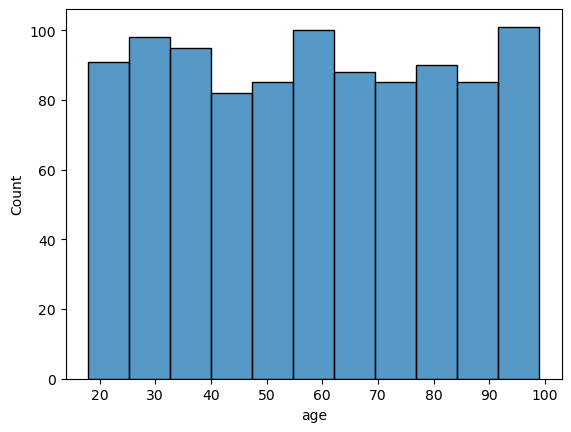

In [185]:
sns.histplot(df.age)

<Axes: xlabel='gender', ylabel='annual_income_in_usd'>

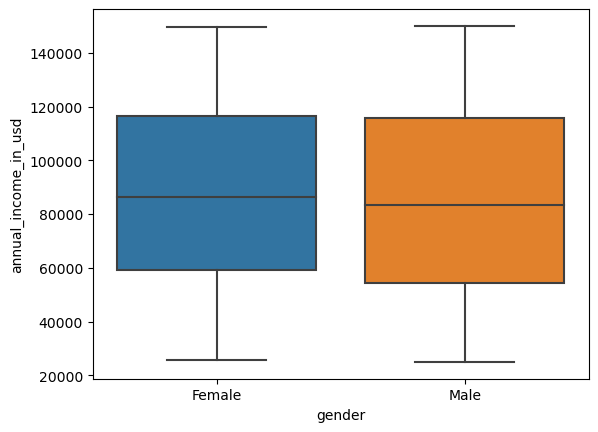

In [186]:
sns.boxplot(data=df, x='gender', y='annual_income_in_usd')

<Axes: xlabel='marital_status', ylabel='count'>

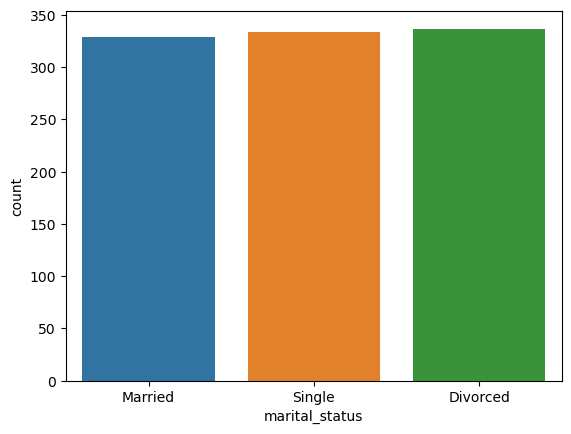

In [187]:
sns.countplot(data=df, x='marital_status')

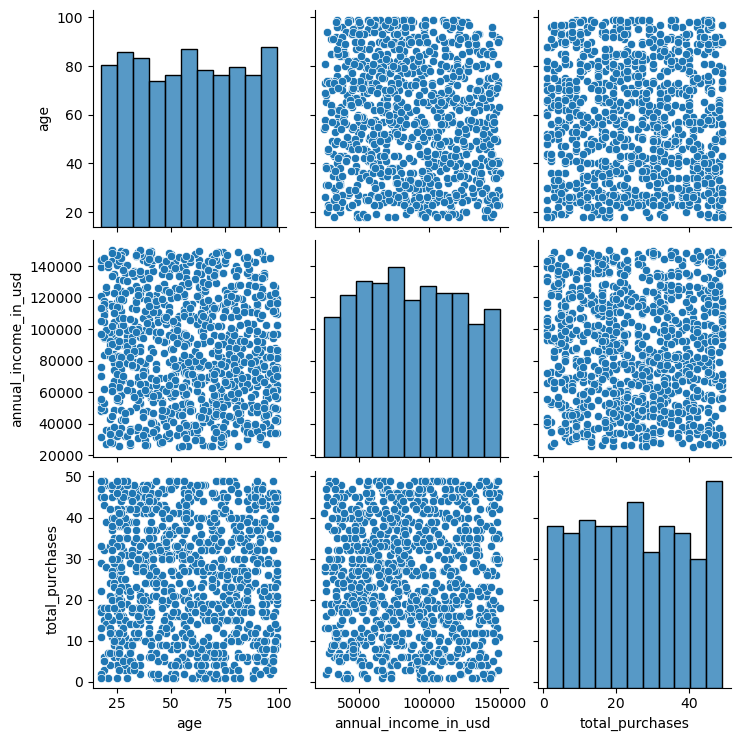

In [188]:
sns.pairplot(df[['age', 'annual_income_in_usd', 'total_purchases']])

<Axes: >

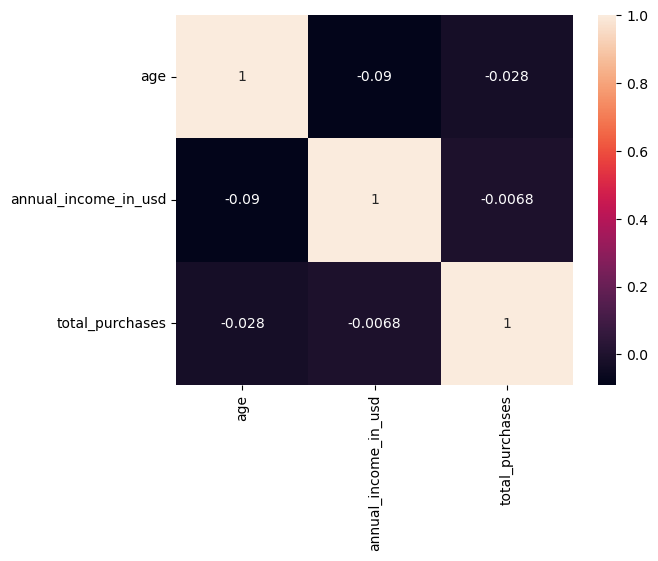

In [189]:
sns.heatmap(df[['age', 'annual_income_in_usd', 'total_purchases']].corr(), annot=True)

<Axes: xlabel='age', ylabel='annual_income_in_usd'>

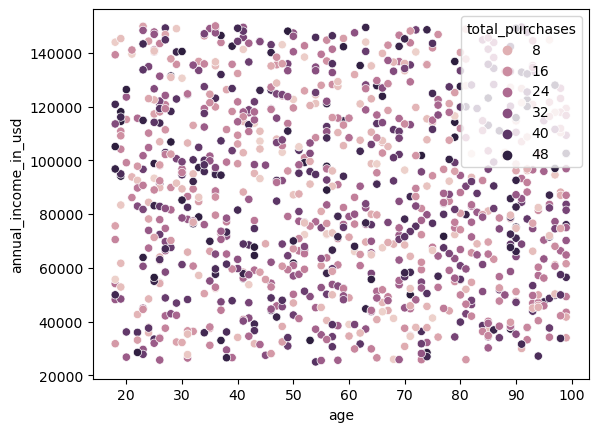

In [190]:
sns.scatterplot(data=df[['age', 'annual_income_in_usd', 'total_purchases']], x='age', y='annual_income_in_usd', hue='total_purchases')

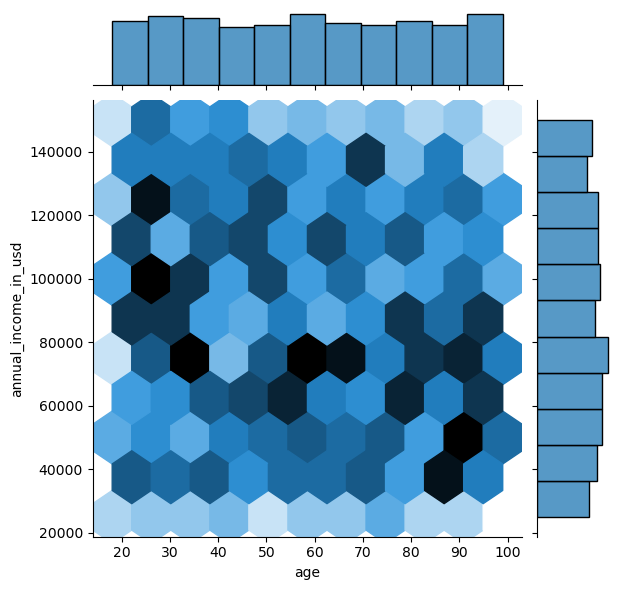

In [191]:
sns.jointplot(data=df, x='age', y='annual_income_in_usd', kind='hex')
plt.show()

# K Means

In [192]:
# features
X = df[['annual_income_in_usd', 'total_purchases']].values
X

array([[106098,     11],
       [142620,     19],
       [107244,     41],
       ...,
       [ 99362,     33],
       [ 66496,      3],
       [121458,     16]])

In [193]:
from sklearn.cluster import KMeans

D:\apps\anaconda\files\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\apps\anaconda\files\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\apps\anaconda\files\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\apps\anaconda\files\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\apps\anaconda\files\lib\site-packages\sklearn\cluster\_kmeans

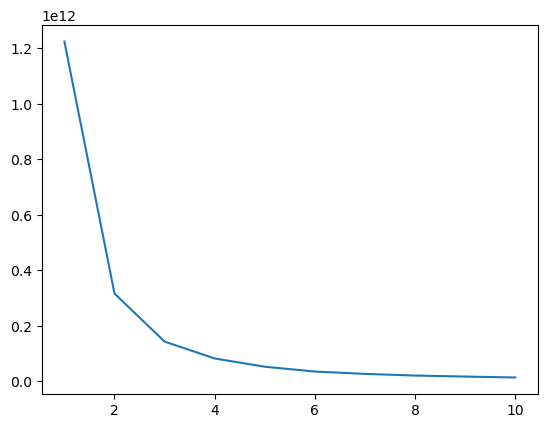

In [194]:
# finding the right amount of clusters for kmeans using elbow method
wcss_list = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss_list)
plt.show()

In [195]:
# K means clustering and its training
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_predict = kmeans.fit_predict(X)

D:\apps\anaconda\files\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


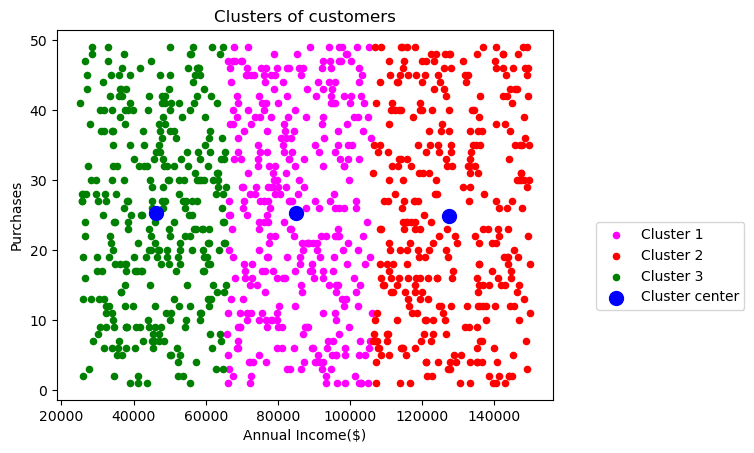

In [196]:
# visualizing each cluster and their respective centers
plt.scatter(X[y_predict==0, 0], X[y_predict==0, 1], s=20, c='magenta', label='Cluster 1')
plt.scatter(X[y_predict==1, 0], X[y_predict==1, 1], s=20, c='red', label='Cluster 2')
plt.scatter(X[y_predict==2, 0], X[y_predict==2, 1], s=20, c='green', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'blue', label = 'Cluster center')   

plt.title('Clusters of customers')
plt.xlabel('Annual Income($)')
plt.ylabel('Purchases')
plt.legend(bbox_to_anchor=(0.9, 0., 0.5, 0.5))
plt.show()

# Summary

In our analysis using K-means clustering, we aimed to uncover underlying patterns and groupings within our dataset based on the features we selected. The goal was to identify distinct clusters of customers that exhibit similar behavior in terms of annual income and purchases.

Upon running the K-means clustering algorithm and examining the resulting visualization, we observed that the three clusters we defined seem to exhibit nearly identical patterns. This outcome raises several interesting insights and considerations.

The output image is clearly showing the three different clusters with different colors. The clusters are formed between two parameters of the dataset; Annual income of customer and Purchases. We can change the colors and labels as per the requirement or choice. We can also observe some points from the above patterns, which are given below:

#### Similar Patterns Across Clusters:
The fact that all three clusters display comparable graphs suggests that the algorithm faced challenges in distinguishing clear and separate patterns within the data using the chosen features. While we had hoped to find distinct customer segments based on annual income and purchases, the data does not appear to exhibit these expected separations.

#### Potential Explanations:
There could be several reasons behind this outcome. One possibility is that the features we selected are not sufficient to effectively differentiate between the clusters. This might indicate that additional factors or features need to be considered to accurately capture the nuances in customer behavior.

In conclusion, the current K-means clustering analysis has given us a starting point for understanding customer behavior based on annual income and purchases. While the initial results did not yield distinct clusters, they have provided us with directions for further exploration and refinement of our analysis methodology.